**Clasificación del rendimiento de los estudiantes en la utilización de la plataforma e-ducativa en el IES de Charata ingreso 2021**


---

Dataset: iescharata_pru.csv

Conjunto: 381 registros

Extraidos: https://inscharata-cha.infd.edu.ar/aula/administracion/

Modificado de manera local. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [2]:
from google.colab import files
 
files.upload() 

dataframe = pd.read_csv(r"iescharata_pru.csv")
dataframe.head(10)


Saving iescharata_pru.csv to iescharata_pru.csv


,Tiempo,Avance,Realiza,Presenta,Textos,Material,Foros,Aprueba
0,3.72,32,45.27,33.33,22.73,100.00,25.0,1
1,1.00,20,16.00,0.00,18.18,33.33,12.5,0
2,7.45,72,54.55,0.00,68.18,100.00,50.0,1
3,0.15,8,9.47,0.00,4.55,33.33,0.0,0
4,0.00,0,0.00,0.00,0.00,0.00,0.0,0
5,0.00,0,0.00,0.00,0.00,0.00,0.0,0
6,0.25,36,10.23,0.00,40.91,0.00,0.0,0
7,0.10,44,12.50,0.00,50.00,0.00,0.0,0
8,1.13,20,5.68,0.00,22.73,0.00,0.0,0
9,6.22,48,30.21,0.00,50.00,33.33,37.5,1


In [ ]:
print(dataframe.groupby('Aprueba').size())

Aprueba
0    257
1    124
dtype: int64


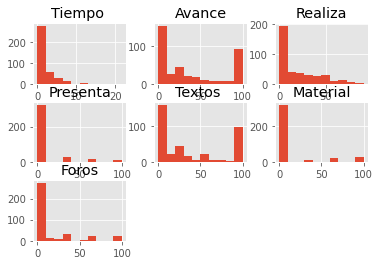

In [13]:
dataframe.drop(['Aprueba'], axis=1).hist()
plt.show()

In [14]:
dataframe['Actividad']=(dataframe['Presenta']+dataframe['Avance']+dataframe['Realiza'])
dataframe['Participa']=dataframe['Foros']+dataframe['Material']
dataframe.drop(['Presenta','Avance','Realiza'], axis=1).head(10)

,Tiempo,Textos,Material,Foros,Aprueba,Actividad,Participa
0,3.72,22.73,100.00,25.0,1,110.60,125.00
1,1.00,18.18,33.33,12.5,0,36.00,45.83
2,7.45,68.18,100.00,50.0,1,126.55,150.00
3,0.15,4.55,33.33,0.0,0,17.47,33.33
4,0.00,0.00,0.00,0.0,0,0.00,0.00
5,0.00,0.00,0.00,0.0,0,0.00,0.00
6,0.25,40.91,0.00,0.0,0,46.23,0.00
7,0.10,50.00,0.00,0.0,0,56.50,0.00
8,1.13,22.73,0.00,0.0,0,25.68,0.00
9,6.22,50.00,33.33,37.5,1,78.21,70.83


In [15]:
reduced = dataframe.drop(['Presenta','Avance','Realiza'], axis=1)
reduced.describe()

,Tiempo,Textos,Material,Foros,Aprueba,Actividad,Participa
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,1.704698,37.592677,12.161050,15.376194,0.325459,63.552677,27.537244
std,2.571173,40.712593,29.533108,29.303986,0.469162,72.584118,42.232635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.620000,22.220000,0.000000,0.000000,0.000000,32.950000,0.000000
75%,2.350000,90.910000,0.000000,12.500000,1.000000,119.000000,66.670000
max,21.670000,100.000000,100.000000,100.000000,1.000000,290.630000,162.500000


In [16]:
X=dataframe.drop(['Aprueba'], axis=1)
y=dataframe['Aprueba']
 
best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Tiempo ', 'Avance', 'Realiza', 'Actividad', 'Participa'], dtype='object')


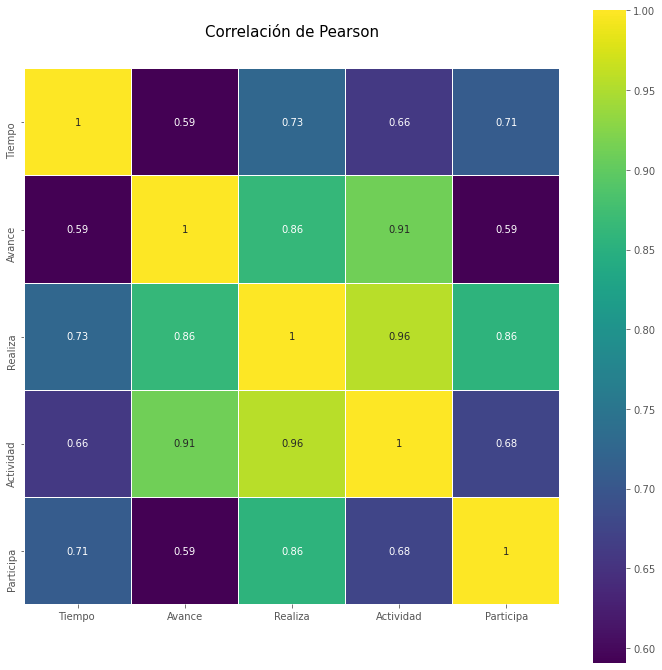

In [17]:
used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación de Pearson', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [ ]:
# Se divide el dataset en datos de entrenamiento y de prueba
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6) 
y_train =X_train["Aprueba"]
y_test = X_test["Aprueba"]

In [ ]:
# Instanciando el clasificador
gnb = GaussianNB()
# Entrenando el clasificador
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.91
Precisión en el set de Test: 0.86


In [ ]:
#                 ['Tiempo', 'Avance', 'Realiza', 'Presenta', 'Foros']
print(gnb.predict([[3.5,        72,     54.5,       29,         60],
                   [1,          25,        0,       15,          0]]))
#Resultado esperado 0-Desaprueba, 1-Aprueba taller

[1 0]
